In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set Path
path=r'C:\\\\Users\\\\maad0\\\\OneDrive\\\\\\\\\\\\\\\\CAREERFOUNDRY Notes\\\\Python Fundamentals for Data Analyst\\\\08-2023 Instacart Basket Analysis'

In [3]:
# Import dataframe
high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','high_activity_customers.pkl'))

In [4]:
high_activity_customers.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'num_dependants',
       'fam_status', 'income', 'order_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'orders_time_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_prior_orders', 'frequency_flag',
       '_merge', 'region', 'customer_activity'],
      dtype='object')

In [5]:
high_activity_customers.shape

(29271990, 34)

#### Step 5. Create a profiling variable based on age, income, certain goods in the "department_id" columns, and number of dependents. You might also use the "orders_day_of_the_week" and "order_hour_of_day" columns if you can think of a way they would impact customer profiles.

In [6]:
# Create profiling variables
high_activity_customers.loc[high_activity_customers['age'] <= 29, 'age_group'] = '18-29'
high_activity_customers.loc[(high_activity_customers['age'] > 29) & (high_activity_customers['age'] < 40), 'age_group'] = '30-39'
high_activity_customers.loc[(high_activity_customers['age'] > 39) & (high_activity_customers['age'] < 50), 'age_group'] = '40-49'
high_activity_customers.loc[(high_activity_customers['age'] > 49) & (high_activity_customers['age'] < 60), 'age_group'] = '50-59'
high_activity_customers.loc[(high_activity_customers['age'] > 59) & (high_activity_customers['age'] < 70), 'age_group'] = '60-69'
high_activity_customers.loc[high_activity_customers['age'] > 69, 'age_group'] = '70 and over'

In [7]:
# Check frequency
high_activity_customers['age_group'].value_counts(dropna = False)

70 and over    5494822
18-29          5493662
40-49          4602752
50-59          4594210
30-39          4582098
60-69          4504446
Name: age_group, dtype: int64

In [8]:
high_activity_customers.head()

,user_id,gender,state,age,date_joined,num_dependants,fam_status,income,order_id,eval_set,...,max_order,loyalty_flag,avg_price,spending_flag,median_prior_orders,frequency_flag,_merge,region,customer_activity,age_group
0,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,2543867,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49
1,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,1285508,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49
2,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,2578584,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49
3,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,423547,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49
4,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,2524893,prior,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49


In [9]:
# Income Groups
high_activity_customers.loc[high_activity_customers['income'] <= 75000, 'income_group'] = 'Lower'
high_activity_customers.loc[(high_activity_customers['income'] > 75000) & (high_activity_customers['income'] <= 120000), 'income_group'] = 'Middle'
high_activity_customers.loc[high_activity_customers['income'] > 120000, 'income_group'] = 'Upper'

In [10]:
# Check frequency of income groups
high_activity_customers['income_group'].value_counts(dropna = False)

Middle    11239730
Lower      9355243
Upper      8677017
Name: income_group, dtype: int64

In [11]:
high_activity_customers.head()

,user_id,gender,state,age,date_joined,num_dependants,fam_status,income,order_id,eval_set,...,loyalty_flag,avg_price,spending_flag,median_prior_orders,frequency_flag,_merge,region,customer_activity,age_group,income_group
0,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,2543867,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper
1,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,1285508,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper
2,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,2578584,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper
3,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,423547,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper
4,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,2524893,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper


In [12]:
# Importing department data
df_dep_t_new = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'))

In [13]:
df_dep_t_new

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
# Rename column
df_dep_t_new = df_dep_t_new.rename(columns = {'Unnamed: 0' : 'department_id'})

In [15]:
df_dep_t_new

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [16]:
high_activity_customers.head()

,user_id,gender,state,age,date_joined,num_dependants,fam_status,income,order_id,eval_set,...,loyalty_flag,avg_price,spending_flag,median_prior_orders,frequency_flag,_merge,region,customer_activity,age_group,income_group
0,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,2543867,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper
1,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,1285508,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper
2,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,2578584,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper
3,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,423547,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper
4,26711,Female,Missouri,48.0,1/1/2017,3.0,married,165665.0,2524893,prior,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high activity,40-49,Upper


In [17]:
df_dep_t_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [18]:
high_activity_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29271990 entries, 0 to 30630810
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 object  
 1   gender                  object  
 2   state                   object  
 3   age                     float16 
 4   date_joined             object  
 5   num_dependants          float64 
 6   fam_status              object  
 7   income                  float64 
 8   order_id                int32   
 9   eval_set                object  
 10  order_number            int32   
 11  orders_day_of_week      int8    
 12  orders_time_of_day      int64   
 13  days_since_prior_order  float16 
 14  product_id              int64   
 15  add_to_cart_order       int64   
 16  reordered               int64   
 17  product_name            object  
 18  aisle_id                int64   
 19  department_id           int64   
 20  prices                  float64 
 21  price_

In [19]:
# Merging the departments dataframe with high_active_customers dataframe.
df_merged = high_activity_customers.merge(df_dep_t_new, on = 'department_id')

In [20]:
# checking the merge result
df_merged[['user_id', 'department_id', 'department']].head(10)

,user_id,department_id,department
0,26711,7,beverages
1,26711,7,beverages
2,26711,7,beverages
3,33890,7,beverages
4,33890,7,beverages
5,33890,7,beverages
6,33890,7,beverages
7,65803,7,beverages
8,65803,7,beverages
9,65803,7,beverages


In [21]:
# Creating flag for number of dependants in a household

df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['num_dependants'] ==0), 'customer_profile'] = 'Single adult'
df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['num_dependants'] >0), 'customer_profile'] = 'Young parent'
df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['num_dependants'] <=2), 'customer_profile'] = 'Family'
df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['num_dependants'] >2), 'customer_profile'] = 'Big Family'

In [22]:
# Checking the results
df_merged[['fam_status', 'num_dependants', 'customer_profile']].head(30)

,fam_status,num_dependants,customer_profile
0,married,3.0,Big Family
1,married,3.0,Big Family
2,married,3.0,Big Family
3,single,0.0,Single adult
4,single,0.0,Single adult
5,single,0.0,Single adult
6,single,0.0,Single adult
7,married,2.0,Family
8,married,2.0,Family
9,married,2.0,Family


In [23]:
df_merged['customer_profile'].value_counts(dropna = False)

Family          13675812
Single adult     7312833
Big Family       6878170
Young parent     1405175
Name: customer_profile, dtype: int64

### Step 6. Create an appropriate visualization to show the distribution of profiles.

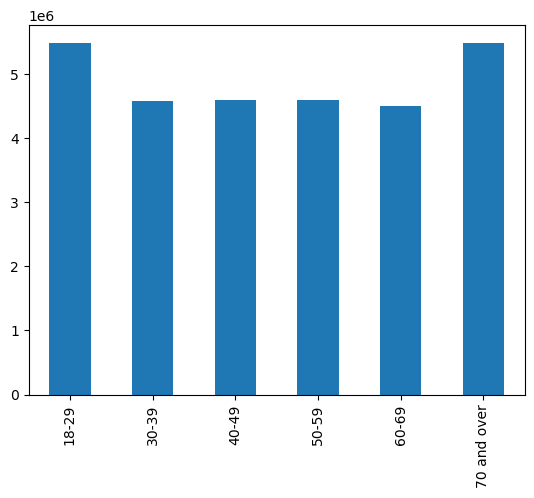

In [24]:
# Creating bar chart for 'age_category'
bar_age_group = df_merged['age_group'].value_counts().sort_index().plot.bar()

In [25]:
# Exporting bar chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

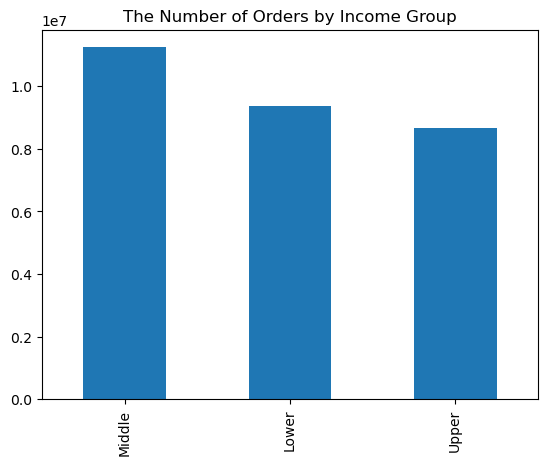

In [26]:
# Bar chart of income_group
bar_income_group = df_merged['income_group'].value_counts().plot.bar(title ='The Number of Orders by Income Group')

In [27]:
# Exporting bar chart
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group.png'))

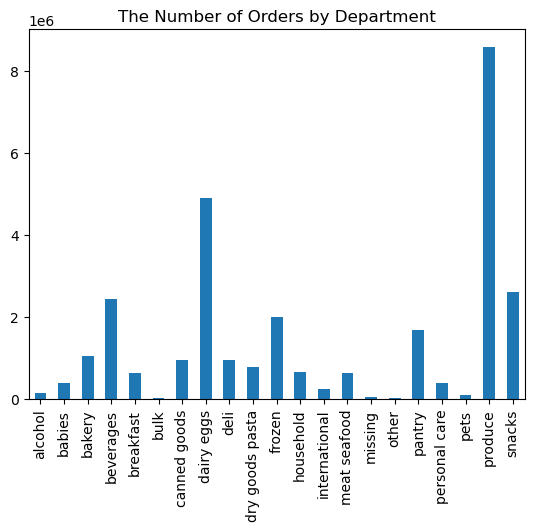

In [28]:
# Creating a bar chart for departments
bar_department = df_merged['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

In [29]:
# Exporting bar chart
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'))

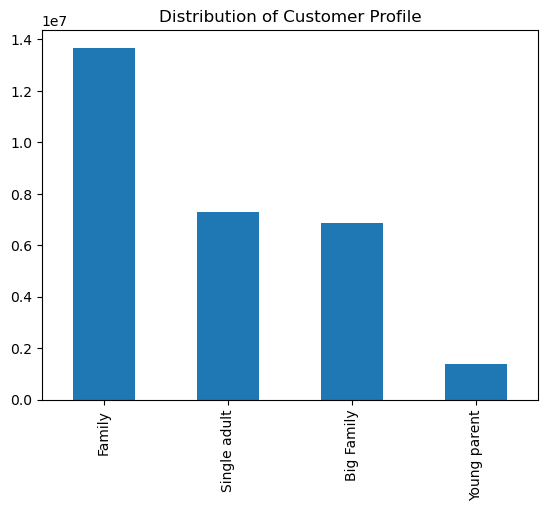

In [30]:
# Creating a bar chart for 'customer_profile'
bar_family_status = df_merged['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile')

In [31]:
# Exporting bar chart
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))

### Step 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [32]:
# Aggregating the Age Group of Customers
age_group_agg = df_merged.groupby('age_group',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [33]:
# Checking results
age_group_agg

days_since_prior_order                  prices                    
                               min   max       mean    min      max       mean
age_group                                                                     
18-29                          0.0  30.0  10.827431    1.0  99999.0  12.233169
30-39                          0.0  30.0  10.813317    1.0  99999.0  11.609273
40-49                          0.0  30.0  10.813343    1.0  99999.0  12.334605
50-59                          0.0  30.0  10.852297    1.0  99999.0  11.808846
60-69                          0.0  30.0  10.789035    1.0  99999.0  11.625688
70 and over                    0.0  30.0  10.808712    1.0  99999.0  11.575740

In [34]:
# Aggregating the Income of Customers
income_group_agg = df_merged.groupby('income_group',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [35]:
# Checking results
income_group_agg

days_since_prior_order                  prices           \
                                min   max       mean    min      max   
income_group                                                           
Lower                           0.0  30.0  10.909051    1.0  14900.0   
Middle                          0.0  30.0  10.780090    1.0  99999.0   
Upper                           0.0  30.0  10.767367    1.0  99999.0   

                         
                   mean  
income_group             
Lower          7.453016  
Middle         9.421863  
Upper         19.796562

In [36]:
# Aggregating the Dependants of Customers
customer_profile_agg = df_merged.groupby('customer_profile',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [37]:
# Checking results
customer_profile_agg

days_since_prior_order                  prices           \
                                    min   max       mean    min      max   
customer_profile                                                           
Big Family                          0.0  30.0  10.833146    1.0  99999.0   
Family                              0.0  30.0  10.827610    1.0  99999.0   
Single adult                        0.0  30.0  10.796365    1.0  99999.0   
Young parent                        0.0  30.0  10.752314    1.0  99999.0   

                             
                       mean  
customer_profile             
Big Family        11.638967  
Family            11.933077  
Single adult      12.124345  
Young parent      11.021015

In [38]:
# Aggregating the Departments
department_customer_profile_agg = df_merged.groupby(['customer_profile', 'department'])[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [39]:
# Checking results
department_customer_profile_agg

days_since_prior_order                  prices  \
                                                  min   max       mean    min   
customer_profile department                                                     
Big Family       alcohol                          0.0  30.0   9.894072    1.0   
                 babies                           0.0  30.0   9.610147    1.0   
                 bakery                           0.0  30.0  10.792677    1.0   
                 beverages                        0.0  30.0  10.820286    1.0   
                 breakfast                        0.0  30.0  11.095163    1.0   
...                                               ...   ...        ...    ...   
Young parent     pantry                           0.0  30.0  10.575051    1.0   
                 personal care                    0.0  30.0  11.267945    1.0   
                 pets                             0.0  30.0  11.334085    1.0   
                 produce                          0.0  30.0  10.567055    1.0   
                 snacks                           0.0  30.0  10.640636    1.6   

                                                
                                 max      mean  
customer_profile department                     
Big Family       alcohol        15.0  8.257182  
                 babies         15.0  7.660943  
                 bakery         15.0  7.869093  
                 beverages      15.0  7.664441  
                 breakfast      14.9  8.015234  
...                              ...       ...  
Young parent     pantry         20.0  8.018361  
                 personal care  15.0  7.931721  
                 pets           15.0  7.953305  
                 produce        15.0  8.006193  
                 snacks          7.0  4.268758  

[84 rows x 6 columns]

### Step 8. Compare your customer profiles with regions and departments. Can you identify a link between them?

In [40]:
# Checking the relationship between customer profiles, regions and departments
cust_prof_region = df_merged.groupby('department')[['customer_profile','region']].value_counts().reset_index(name='count')

In [41]:
cust_prof_region

,department,customer_profile,region,count
0,alcohol,Family,South,19916
1,alcohol,Family,West,16995
2,alcohol,Family,Midwest,14291
3,alcohol,Big Family,South,12757
4,alcohol,Family,Northeast,10851
...,...,...,...,...
331,snacks,Big Family,Northeast,111544
332,snacks,Young parent,South,41574
333,snacks,Young parent,West,32857
334,snacks,Young parent,Midwest,27234


In [42]:
# Checking customer_profile by regions
region_profile = pd.crosstab(df_merged['customer_profile'], df_merged['region'], dropna = False)

In [43]:
region_profile

region,Midwest,Northeast,South,West
customer_profile,,,,
Big Family,1570292,1220169,2291448,1796261
Family,3232905,2434147,4540978,3467782
Single adult,1726864,1280026,2433209,1872734
Young parent,330032,243895,481648,349600


In [44]:
# Create crosstab of customer income group and region
region_income_group = pd.crosstab(df_merged['income_group'], df_merged['region'], dropna = 'False')

In [45]:
region_income_group

region,Midwest,Northeast,South,West
income_group,,,,
Lower,2166828,1635714,3130339,2422362
Middle,2613812,1995493,3769363,2861062
Upper,2079453,1547030,2847581,2202953


In [46]:
cust_prof_region2 = df_merged.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

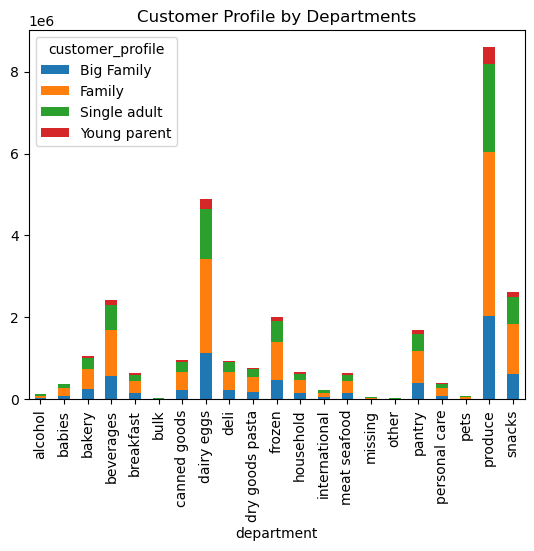

In [47]:
cust_prof_region2_bar = cust_prof_region2.plot.bar(stacked = True, title = 'Customer Profile by Departments')

In [48]:
# Export stacked bar chart
cust_prof_region2_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','cust_prof_region2.png')) 

###  Step 9. Produce suitable charts to illustrate your results.

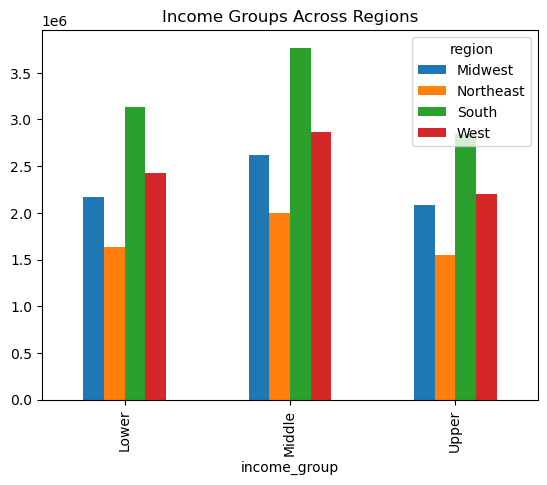

In [53]:
# Visualtization of 'income_class' and 'region'
bar_region_income_group = region_income_group.plot.bar(title = 'Income Groups Across Regions')

In [54]:
# Export Income across Regions bar chart
bar_region_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_region_income_group.png'))

In [55]:
# Create crosstab to consider classifications- age with certain types of goods
cross_tab_age_group = pd.crosstab(df_merged['department'],df_merged['age_group'])

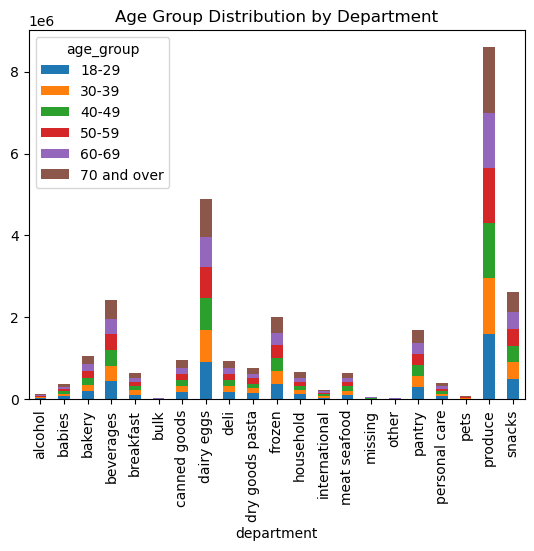

In [56]:
# Creating a clustered bar char
clustered_cross_tab_age_group = cross_tab_age_group.plot(kind='bar', stacked=True, title='Age Group Distribution by Department')

In [57]:
# Exporting clustered bar chart
clustered_cross_tab_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustered_cross_tab_age_group.png'))

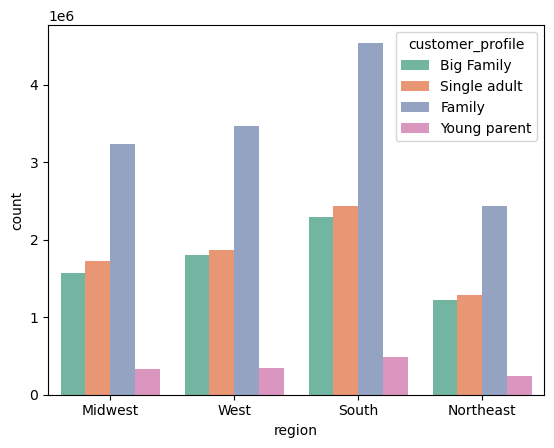

In [58]:
# Create a countplot to visualize the distribution of 'customer_profile' in each 'region'
countplot_customer_by_region = sns.countplot(x='region', hue='customer_profile', data=df_merged, palette='Set2')

In [59]:
#  Exporting Countplot bar chart
countplot_customer_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'countplot_customer_by_region.png'))

In [61]:
# Exporting Merged Dataframe
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_dept_merged.pkl'))